In [54]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import mlab
from scipy import signal, stats
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression

day_list_long = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
    "31",
]
day_list_short = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
]
day_list_Feb = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
]
hour_list = [
    "00",
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
]
x_label = []
for month in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
    if month in ["01", "03", "05", "07", "08", "10", "12"]:
        day_list = day_list_long
    elif month == "02":
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0, 24):
            hour = str(hour)
            key = int("21" + month + day + hour)
            key = str(key)
            x_label.append(key)


mobile = np.load(
    "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/numpy_array/Tokyostation.npy"
)
tweets = np.load(
    "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/numpy_array/Tokyostaion.npy"
)
name_key = "Tokyostation"

mobile = np.sum(mobile, axis=1)
tweets = np.sum(tweets, axis=1)


list_Week_of_Day = []
for i in range(0, 365):
    if i % 7 == 1:
        list_Week_of_Day.append("Holiday")
    if i % 7 == 2:
        list_Week_of_Day.append("Holiday")
    if i % 7 == 0:
        list_Week_of_Day.append("Workday")
    if i % 7 == 3:
        list_Week_of_Day.append("Workday")
    if i % 7 == 4:
        list_Week_of_Day.append("Workday")
    if i % 7 == 5:
        list_Week_of_Day.append("Workday")
    if i % 7 == 6:
        list_Week_of_Day.append("Workday")


df = pd.DataFrame(
    data=np.stack([mobile, tweets, list_Week_of_Day]).T,
    columns=["number of people", "number of Tweets", "Week_of_Day"],
)
df["number of Tweets"] = df["number of Tweets"].astype(float)
df["number of people"] = df["number of people"].astype(float)



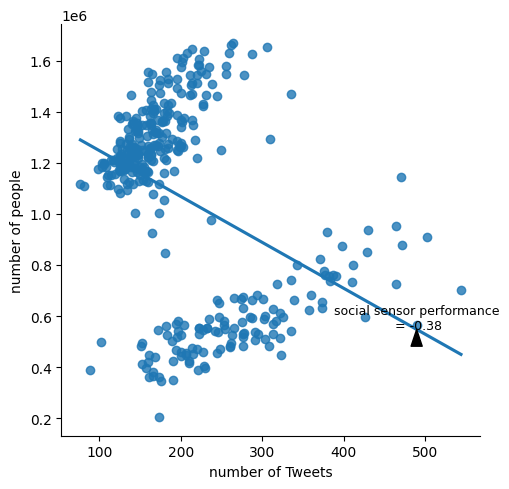

In [62]:
g = sns.lmplot(x="number of Tweets", y="number of people", data=df, ci=None, legend=True)

# 回帰係数と切片の取得

# x座標の中央の計算
mid_x = (df["number of Tweets"].max()) * 0.9

# 中央のx座標に対応するy座標の計算
mid_y = slope * mid_x + intercept
X = mobile
y = tweets
correlation, p_value = stats.pearsonr(X, y)
# annotateを使用してテキストを追加
ax = g.ax
ax.annotate(f'social sensor performance\n = {correlation:.2f}', xy=(mid_x, mid_y), xytext=(mid_x, mid_y + 1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=8),
            fontsize=9, ha='center')

plt.show()